#A continuación se describen dos formas de representar redes bayesianas. La primera siendo desde cero mediante definiendo clases de variables aleatorias. La segunda haciendo uso de gráficas mediante atributos en los nodos.

### Clases

In [ ]:
"""
Esta los elementos de esta clase van a tener nombre, una tabla de probabilidades
definida posteriormente, y la lista de padres.
"""
class VA:
  def __init__(self, name, *padre):
    self.name = name
    self.TablaProba = None
    self.padre = list(padre)

In [ ]:
burglary = VA("Robo", None)
sismo = VA("Sismo", None)
alarm = VA("Alarma", burglary, sismo)
john = VA("JohnCalls", alarm)
mary = VA("MaryCalls", alarm)

RedBayes = [burglary, sismo, alarm, john, mary] #¡Esta es la red!

In [ ]:
for i in RedBayes:
  for j in i.padre:
    if j != None:
      print(f"Padre: {j.name}, Hijo: {i.name}")
    else:
      print(f"Padre: {j}, Hijo: {i.name}")

Padre: None, Hijo: Robo
Padre: None, Hijo: Sismo
Padre: Robo, Hijo: Alarma
Padre: Sismo, Hijo: Alarma
Padre: Alarma, Hijo: JohnCalls
Padre: Alarma, Hijo: MaryCalls


In [ ]:
# Definimos la tabla de probabilidades condicional para cada variable

burglary.TablaProba = {
    '+b' : 0.001,
    '-b' : 0.999
}

sismo.TablaProba = {
    '+s' : 0.002,
    '-s' : 0.998
}

alarm.TablaProba = {
    '+b+e+a' : 0.95,
    '+b+e-a' : 0.05,
    '+b-e+a' : 0.94,
    '+b-e-a' : 0.06,
    '-b+e+a' : 0.29,
    '-b+e-a' : 0.71,
    '-b-e+a' : 0.001,
    '-b-e-a' : 0.999,
}

john.TablaProba = {
    '+a+j' : 0.9,
    '+a-j' : 0.1,
    '-a+j' : 0.05,
    '-a-j' : 0.95,
}

mary.TablaProba = {
    '+a+m' : 0.7,
    '+a-m' : 0.3,
    '-a+m' : 0.01,
    '-a-m' : 0.99,
}

for i in RedBayes:
  print(i.TablaProba)

{'+b': 0.001, '-b': 0.999}
{'+s': 0.002, '-s': 0.998}
{'+b+e+a': 0.95, '+b+e-a': 0.05, '+b-e+a': 0.94, '+b-e-a': 0.06, '-b+e+a': 0.29, '-b+e-a': 0.71, '-b-e+a': 0.001, '-b-e-a': 0.999}
{'+a+j': 0.9, '+a-j': 0.1, '-a+j': 0.05, '-a-j': 0.95}
{'+a+m': 0.7, '+a-m': 0.3, '-a+m': 0.01, '-a-m': 0.99}


Si bien esta forma de describir redes bayesianas cumple y describe las relaciones, la estructura de las variables únicamente está dada por el valor .padre, así que poder iterar sobre esto y generar métodos como d-separación e inferencia es complicado.

### Grafos

In [ ]:
import networkx as nx

In [ ]:
def create_bayes(nodes, edges):
    """
    Regresa una red bayesiana, dado un arreglo de nodos,
    donde cada elemento de la lista es un par (nombre, características)
    con característica (color y tabla de probabilidad)
    y un arreglo con la relaciones entre esos nodos (parejas origen, destino)
    """
    graph = nx.DiGraph()
    graph.add_nodes_from(nodes)
    graph.add_edges_from(edges)

    return graph

def show_node(nodes):
    """
    Nos muestra el nombre color y tabla de probabilidad de cada nodo
    """
    for n in nodes.data():
        print(f"Nodo: {n[0]}\nColor: {n[1]['color']} \nProb:")
        for p in n[1]['table']:
            print(f"{p}: {n[1]['table'][p]}")
        print('-------------\n')


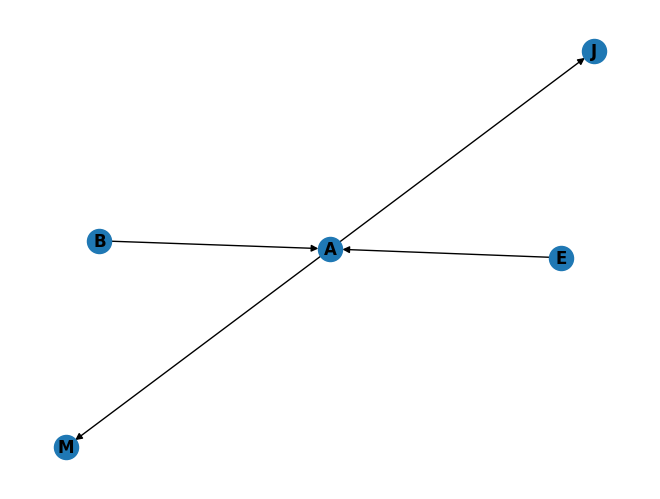

In [ ]:
info_b = {'color': 'white', 'table': {'+b': 0.001, '-b': 0.999}}
info_e = {'color': 'white', 'table': {'+e': 0.002, '-e': 0.998}}
info_a = {'color': 'white', 'table': {'+b+e+a': 0.95,
                                      '+b+e-a': 0.05,
                                      '+b-e+a': 0.94,
                                      '+b-e-a': 0.06,
                                      '-b+e+a': 0.29,
                                      '-b+e-a': 0.71,
                                      '-b+e+a': 0.001,
                                      '-b-e-a': 0.999}}
info_j = {'color': 'white', 'table': {'+a+j': 0.9, '+a-j': 0.1, '-a+j': 0.05, '-a-j': 0.95}}
info_m = {'color': 'white', 'table': {'+a+m': 0.7, '+a-m': 0.3, '-a+m': 0.01, '-a-m': 0.99}}
nodes_alarm = [('B', info_b), ('E', info_e), ('A', info_a), ('J', info_j), ('M', info_m)]
edges_alarm = [('B', 'A'), ('E', 'A'), ('A', 'J'), ('A', 'M')]

graph_alarm = create_bayes(nodes_alarm, edges_alarm)
nx.draw(graph_alarm, with_labels=True, font_weight='bold')

In [ ]:
show_node(graph_alarm.nodes)

Nodo: B
Color: white 
Prob:
+b: 0.001
-b: 0.999
-------------

Nodo: E
Color: white 
Prob:
+e: 0.002
-e: 0.998
-------------

Nodo: A
Color: white 
Prob:
+b+e+a: 0.95
+b+e-a: 0.05
+b-e+a: 0.94
+b-e-a: 0.06
-b+e+a: 0.001
-b+e-a: 0.71
-b-e-a: 0.999
-------------

Nodo: J
Color: white 
Prob:
+a+j: 0.9
+a-j: 0.1
-a+j: 0.05
-a-j: 0.95
-------------

Nodo: M
Color: white 
Prob:
+a+m: 0.7
+a-m: 0.3
-a+m: 0.01
-a-m: 0.99
-------------



Nuevamente estamos pasando la información de manera directa, no obstante podemos entender las relaciones entre variables de mejor manera. Además podemos iterar sobre tripletas con mucha mayor facilidad.

### D-Separación

La idea del algoritmo es revisar tripletas a partir de una evidencia dada y determinar el valor de la separación.

In [ ]:
def is_active(path, graph, graph_d):
    """
    Verificamos por tripletas si el camino es activo
    """
    resp = True
    long = len(path)
    for i in range(long):
        if i+3 <= long:
            aux = check_triplets(path[i:i+3], graph, graph_d)
            print(f'Tripleta {path[i:i+3]} es activa? {aux}')
            resp = resp and aux
    return resp

def is_red(suc, graph):
    """Nos indica si un sucesor es observado"""
    for s in suc:
        if graph.nodes[s]['color'] == 'red':
            return True
        else:
            return False

def check_triplets(triplet, graph, graph_d):
    """Verifica si la tripleta no se activa"""
    #Nos fijamos en los hijos de los nodos
    s_0 = list(graph_d.successors(triplet[0]))
    s_1 = list(graph_d.successors(triplet[1]))
    s_2 = list(graph_d.successors(triplet[2]))
    return((triplet[1] in s_0 and triplet[2] in s_1 and graph.nodes[triplet[1]]['color'] == 'white') or
           (triplet[0] in s_1 and triplet[2] in s_1 and graph.nodes[triplet[1]]['color'] == 'white') or
           (triplet[1] in s_0 and triplet[1] in s_2 and (graph.nodes[triplet[1]]['color'] == 'red' or is_red(s_1, graph))))

def check_paths(X_i, X_j, graph, graph_d):
    """Checa si algún camino es activo"""
    for path in nx.all_simple_paths(graph, X_i, X_j):
        if is_active(path, graph, graph_d): # si un camino es activo no son independientes
            return False
        else:
            return True


def d_separacion(X_i, X_j, Z, graph_d):
    """
    Revisa todos los caminos entre X_i y X_j
    Si existe al menos un camino activo dada la evidencia Z
    entonces no hay independencia
    Regresa True si son independientes, False en caso contrario
    """
    #Hacemos la grágica no dirigida, para encontrar todos los caminos no dirigidos
    graph = graph_d.to_undirected()
    for n in Z:
        graph.nodes[n]['color'] = 'red' #los marcamos como evidencia

    return check_paths(X_i, X_j, graph, graph_d)

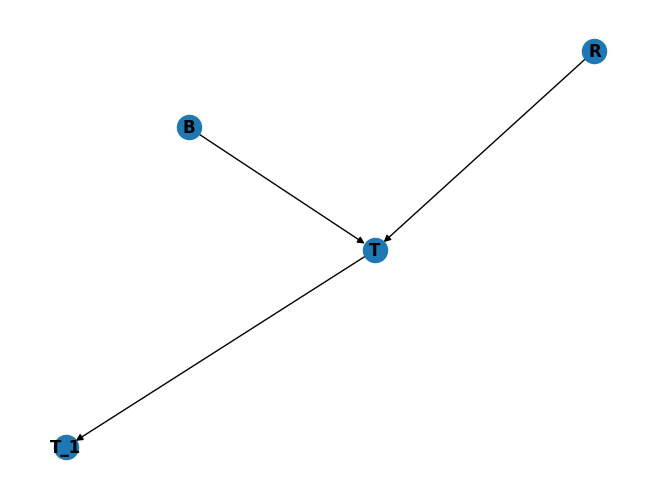

In [ ]:
# Este es un ejemplo en una gráfica/red arbitraria
info_empty = {'color': 'white', 'table': {}}
nodes_D1 = [('R', info_empty), ('B', info_empty), ('T', info_empty), ('T_1', info_empty)]
edges_D1 = [('R', 'T'), ('B', 'T'), ('T', 'T_1')]

graph_D1 = create_bayes(nodes_D1, edges_D1)
nx.draw(graph_D1, with_labels=True, font_weight='bold')

Regresa

In [ ]:
# Evidencia nula
d_separacion('R','B', [], graph_D1)

Tripleta ['R', 'T', 'B'] es activa? False


True

In [ ]:
# Evidencia T
d_separacion('R','B', ['T'], graph_D1)

Tripleta ['R', 'T', 'B'] es activa? True


False

### Inferencia

En particular se implementa el algoritmo de eliminación de variables.

In [ ]:
def sum(factor, table):
    """Dado un facto1 suma sus valores, quita el factor de la tabla"""
    resp = {}
    for val in table:
        n_val = val.replace("+"+factor, "") if "+"+factor in val else val.replace("-"+factor, "")
        if n_val in resp:
            resp[n_val] += table[val]
        else:
            resp[n_val] = table[val]
    return resp

def join(table1, table2):
    """Construye un nuevo factor que sea la unión de la variables involucradas"""
    #Falta normalizar
    for val in table1:
        for v in table2:
            if val in v:
                table2[v] *= table1[val]
    return table2

def del_variables(formula):
    """Aplica el algoritmo de eliminación de variables para inferir"""
    if len(formula[0]) == 1:
        val = sum(formula[1], formula[0][0])
        print('suma ',val)
        return val

    table1 = formula[0].pop()
    if type(table1) == dict:
        table2 = formula[0].pop()
        formula[0] = [join(table1, table2)] + formula[0]
        print('join ', formula)
    else:
        val = del_variables(table1)
        formula[0].append(val)
    return del_variables(formula)

In [ ]:
info_r = {'color': 'white', 'table': {'+r': 0.1, '-r': 0.9}}
info_t = {'color': 'white', 'table': {'+r+t': 0.8, '+r-t': 0.2, '-r+t': 0.1, '-r-t': 0.9}}
info_l = {'color': 'white', 'table': {'+t+l': 0.3, '+t-l': 0.7, '-t+l': 0.1, '-t-l': 0.9}}
nodes_del = [('R', info_r), ('T', info_t), ('L', info_l)]
edges_del = [('R', 'T'), ('T', 'L')]

graph_del = create_bayes(nodes_del, edges_del)

formula_1 = [[info_l['table'], [[info_t['table'], info_r['table']], 'r']], 't']
del_variables(formula_1)

join  [[{'+r+t': 0.08000000000000002, '+r-t': 0.020000000000000004, '-r+t': 0.09000000000000001, '-r-t': 0.81}], 'r']
suma  {'+t': 0.17000000000000004, '-t': 0.8300000000000001}
join  [[{'+t+l': 0.05100000000000001, '+t-l': 0.11900000000000002, '-t+l': 0.08300000000000002, '-t-l': 0.7470000000000001}], 't']
suma  {'+l': 0.13400000000000004, '-l': 0.8660000000000001}


{'+l': 0.13400000000000004, '-l': 0.8660000000000001}

#### Aplicación de inferencia en el problema de la alarma

In [ ]:
# Primero en el caso de P(B|+j,+m)

PJA = {'+a+j': 0.9, '-a+j': 0.05}
PMA = {'+a+m': 0.7, '-a+m': 0.01}
formula_alarm1 = [[info_b['table'],[[info_e['table'], [[info_a['table'], PJA, PMA], 'a']], 'e']],'e']
del_variables(formula_alarm1)

join  [[{'+a+j': 0.9, '-a+j': 0.05}, {'+b+e+a': 0.95, '+b+e-a': 0.05, '+b-e+a': 0.94, '+b-e-a': 0.06, '-b+e+a': 0.001, '-b+e-a': 0.71, '-b-e-a': 0.999}], 'a']
join  [[{'+a+j': 0.9, '-a+j': 0.05}], 'a']
suma  {'+j': 0.9500000000000001}
join  [[{'+e': 0.002, '-e': 0.998}], 'e']
suma  {'': 1.0}
join  [[{'+b': 0.001, '-b': 0.999}], 'e']
suma  {'+b': 0.001, '-b': 0.999}


{'+b': 0.001, '-b': 0.999}

In [ ]:
# Luego en el caso de P(+a|+j,+m)

PJA = {'+a+j': 0.9, '-a+j': 0.05}
PMA = {'+a+m': 0.7, '-a+m': 0.01}
formula_alarm2 = [[info_a['table'], PJA, PMA], 'j']
del_variables(formula_alarm2)

join  [[{'+a+j': 0.9, '-a+j': 0.05}, {'+b+e+a': 0.95, '+b+e-a': 0.05, '+b-e+a': 0.94, '+b-e-a': 0.06, '-b+e+a': 0.001, '-b+e-a': 0.71, '-b-e-a': 0.999}], 'j']
join  [[{'+a+j': 0.9, '-a+j': 0.05}], 'j']
suma  {'+a': 0.9, '-a': 0.05}


{'+a': 0.9, '-a': 0.05}

In [ ]:
# P(+t|+j,+m)

PJA = {'+a+j': 0.9, '-a+j': 0.05}
PMA = {'+a+m': 0.7, '-a+m': 0.01}
formula_alarm3 = [[info_e['table'],[[info_b['table'], [[info_a['table'], PJA, PMA], 'a']], 'b']],'b']
del_variables(formula_alarm3)

join  [[{'+a+j': 0.9, '-a+j': 0.05}, {'+b+e+a': 0.95, '+b+e-a': 0.05, '+b-e+a': 0.94, '+b-e-a': 0.06, '-b+e+a': 0.001, '-b+e-a': 0.71, '-b-e-a': 0.999}], 'a']
join  [[{'+a+j': 0.9, '-a+j': 0.05}], 'a']
suma  {'+j': 0.9500000000000001}
join  [[{'+b': 0.001, '-b': 0.999}], 'b']
suma  {'': 1.0}
join  [[{'+e': 0.002, '-e': 0.998}], 'b']
suma  {'+e': 0.002, '-e': 0.998}


{'+e': 0.002, '-e': 0.998}